<a href="https://colab.research.google.com/github/suhayb-h/Acute-Lymphoblastic-Leukemia-Classifier/blob/main/PyStart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from torch import nn, save, load
import torch
from PIL import Image
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
#MNIST
train = datasets.MNIST(root='data', download=True, train=True, transform=ToTensor())
#MNIST sizes are 1,28,28 (no RGB) and there are 10 classes (0-9)
#dataset = DataLoader(train, 32)

In [25]:
#transform = transforms.Compose([transforms.ToTensor()])

dataset = \
datasets.ImageFolder(
    root = '/content/drive/Othercomputers/My MacBook Air/C-NMC_Leukemia/training_data', 
    transform = ToTensor()
    )

dataloader = \
torch.utils.data.DataLoader(
    dataset, 
    batch_size = 100, 
    shuffle = True
    )

images, labels = next(iter(dataloader))

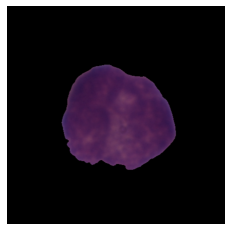

In [26]:
plt.imshow(images[0].permute(1,2,0))
plt.axis("off")
plt.show()

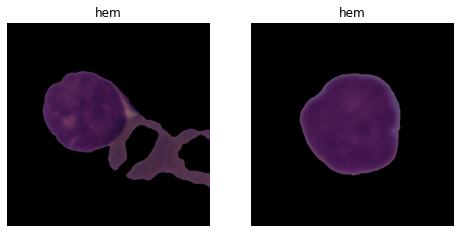

In [27]:
labels_map = {
    0: "hem",
    1: "all"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 2, 1
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze().permute(1,2,0))
plt.show()

In [41]:
# Construct the network
class ImageClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 32, (3,3)),
        nn.ReLU(),
        nn.Conv2d(32, 64, (3,3)),
        nn.ReLU(),
        nn.Conv2d(64, 64, (3,3)),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(64*(28-6)*(28-6), 2) # The last number represents the number of classes
    )
  def forward(self, x):
    return self.model(x)
  
# Instantiate
clf = ImageClassifier()#.to('cuda')
optimizer = Adam(clf.parameters(), lr=1e-3) #lr = learning_rate
loss_fn = nn.CrossEntropyLoss()

# Training flow
if __name__ == "__main__":
  for epoch in range(10):
    for batch in dataset:
      X,y = batch
#      X,y = X.to('cuda'), y.to('cuda')
      y_predict = clf(X)
      loss = loss_fn(y_predict, y)

      # Apply backprop
      optimizer.zero_grad() #0 any gradients
      loss.backward()
      optimizer.step()

    print(f"Epoch {epoch} loss is {loss.item()}")
  
  #save the model
  with open('model_state.pt', 'wb') as f:
    save(clf.state_dict(), f)

RuntimeError: ignored

In [7]:
# Predict
if __name__ == "__main__":
  with open('model_state.pt', 'rb') as f: #rb = read_binary
    clf.load_state_dict(load(f))
  
  img = Image.open('image_1.jpg')
  img_tensor = ToTensor()(img).unsqueeze(0).to('cuda')

  print(torch.argmax(clf(img_tensor)) # the output is printed as tensor(0, blahblahblah). The number (0 in this example) is the predicted class.

SyntaxError: ignored